In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.pyplot import figure as fig
from matplotlib import ticker
import seaborn as sns
def format_city(a): #this func to emphasize the countries
    a["name"]
    return a["name"]
countries = ["England","Wales"]
# def plot_game_week(data,team_name,name_number_dict):
#     x = list(rq1.loc[(rq1["First_team"] == team_name) | (rq1["Second_team"] == team_name)].sort_values(by = "gameweek")["gameweek"])
#     target_data = rq1.loc[((rq1["First_team"] == team_name) | (rq1["Second_team"] == team_name)) ].sort_values(by = "gameweek").reset_index(drop = True)
#     points = [0]*38
#     for i in target_data.index:
#         if target_data["winner"][i] == name_number_dict[team_name]:
#             points[i] = 3
#         elif target_data["winner"][i] == 0:
#             points[i] = 1
#     return x,points

In [2]:
teams = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/teams.json")
teams["country"] = teams["area"].apply(format_city) #to extract the countries from the first columns which is a dict
teams = teams.loc[teams["country"].isin(countries)].reset_index(drop = True)
teams = teams.loc[teams["type"] != "national"] #drop wales and england because it is national club
teams

,area,city,name,officialName,type,wyId,country
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613,England
1,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673,England
2,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531,Wales
3,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659,England
4,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651,England
5,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646,England
6,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631,England
7,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633,England
8,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639,England
9,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644,England


In [3]:
coaches = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/coaches.json")

In [4]:
team_id = set(teams["wyId"].unique())
coaches_id = set(coaches["currentTeamId"].unique())

In [5]:
matches = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/matches/matches_England.json")

#######
# there are functions to separate the label column and create new columns
# to create a First_team column
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # [Away.strip()],Score_home.strip(),Score_away.strip()
    return Home.strip()
matches["First_team"] = matches["label"].apply(format_score_team)
# to create a Second_team column
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Away.strip()
matches["Second_team"] = matches["label"].apply(format_score_team)
# to create a First_score column
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_home.strip()
matches["Score_first"] = matches["label"].apply(format_score_team)
# to create a Second_score column
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_away.strip()
matches["Score_second"] = matches["label"].apply(format_score_team)
#######

# the script to match the number of team and the name of team
name_number = dict(zip(list(teams["name"]),list(teams["wyId"])))

# the script to create for every command their own id 
commands_numbers_1 = []
commands_numbers_2 = []
for i in matches.index:
    commands_numbers_1.append(name_number[matches["First_team"][i]])
    commands_numbers_2.append(name_number[matches["Second_team"][i]])
matches["First_command_id"] = commands_numbers_1
matches["Second_command_id"] = commands_numbers_2

# this function takes the data and First/Second command_id and the index of the row
# this function open the teamData columns and normolize it for First/Second command
# then it merge the datas (First and Second)
# the output of this fuction is merged F/S data 
def extractTeamsData(data,First_command_id,Second_command_id,i):
    a = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(First_command_id)][i])])
    b = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(Second_command_id)][i])])
    pref_1,pref_2 = a["side"][0],b["side"][0] #to understand for which command i have opened the dictrionary
    col_1,col_2 = list(a.columns),list(b.columns) 
    a.columns = list(map(lambda x: x + "_" + pref_1,col_1)) #add the prefix for columns to understand data belongs
    b.columns = list(map(lambda x: x + "_" + pref_2,col_2)) #add the prefix for columns to understand data belongs
    res = pd.merge( a,b,on = a.index,how='outer') #merge the 2 datas because it is for one match
    return res

data = pd.DataFrame()
# this loop creates the data for every mathes with the help of extractTeamsData() function
for i in matches.index:
    data = data.append(extractTeamsData(matches,str("First_command_id"),str("Second_command_id"),i)) #create DataFrame of the teamData columns
data.reset_index(drop = True,inplace=True)
drop_col = ["key_0"]
data.drop(drop_col, inplace=True, axis=1)

matches_data = pd.merge(matches,data,on = matches.index,how='outer') # merge matches and data
drop_col = ["key_0"]
# at this step i merged matche with the dataframe which was created by teamData columns
matches_data.drop(drop_col, inplace=True, axis=1)


**[RQ1] Who wants to be a Champion? During a season could happen that a team has bad periods. For example, more than three consecutive games lost, or it could have a positive trend where it seems to be unbeatable. Let's visualize this trends!**

**Create a plot where each point (x,y) represents the number of points obtained by team x at game week y. In order to show the trends, points related to the same team must be connected to each other. Remind: in soccer each team gets 3 points for a win, 1 point for a tied game, and 0 for a loss. Highlight the two teams that got the longest winning streak (# of consecutive wins), and the two teams that got the longest losing streak (# of consecutive losses).**

**Below you can see a similar example of what we would like you to show us. Keep in mind that you must create this plot for all the entire season (38 game weeks).**

In [6]:
matches_data.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId', 'First_team', 'Second_team', 'Score_first',
       'Score_second', 'First_command_id', 'Second_command_id', 'coachId_home',
       'formation.bench_home', 'formation.lineup_home',
       'formation.substitutions_home', 'hasFormation_home', 'score_home',
       'scoreET_home', 'scoreHT_home', 'scoreP_home', 'side_home',
       'teamId_home', 'coachId_away', 'formation.bench_away',
       'formation.lineup_away', 'formation.substitutions_away',
       'hasFormation_away', 'score_away', 'scoreET_away', 'scoreHT_away',
       'scoreP_away', 'side_away', 'teamId_away'],
      dtype='object')

In [7]:
rq1 = matches_data[['gameweek','label','winner',
                    'First_team', 'Second_team', 'Score_first',
                    'Score_second','First_command_id', 'Second_command_id']]

No handles with labels found to put in legend.


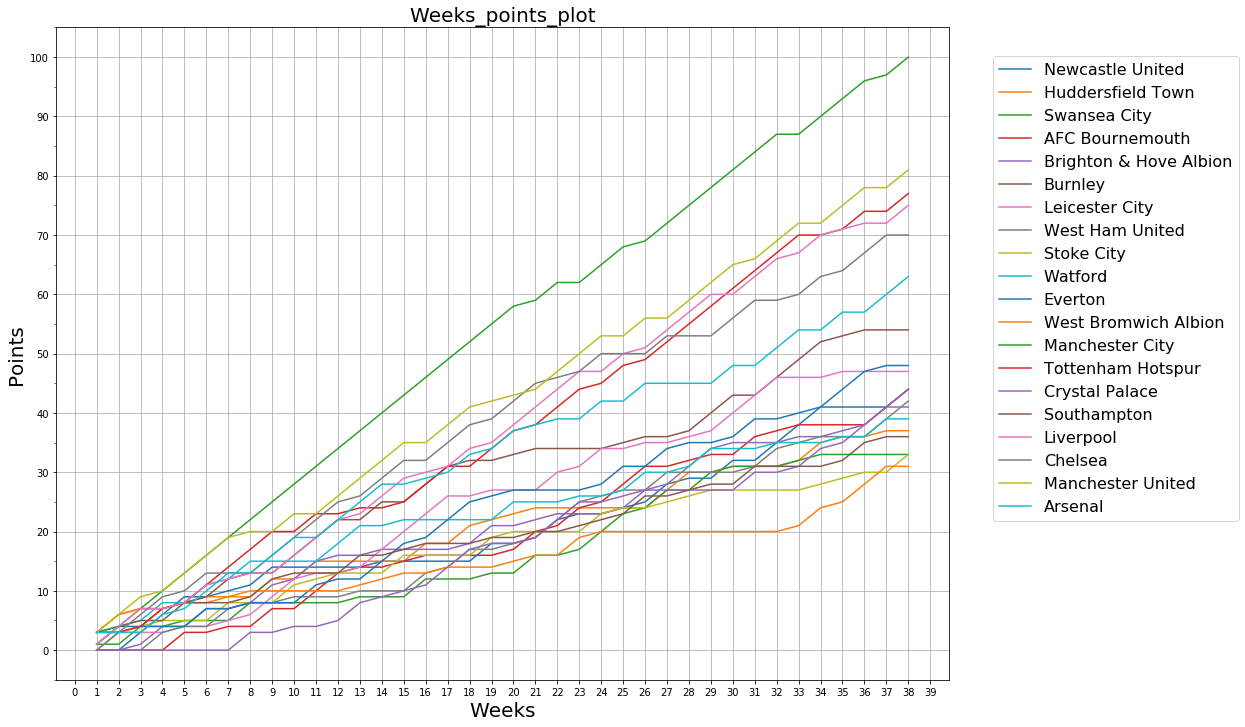

In [8]:
# this function takes the data , team_name and dict of the all team names and teams id
# the output of this fuctions is the weeks when the team played and point which they got for every week
def game_week(data,team_name,name_number_dict):
    x = list(rq1.loc[(rq1["First_team"] == team_name) | (rq1["Second_team"] == team_name)].sort_values(by = "gameweek")["gameweek"])
    target_data = rq1.loc[((rq1["First_team"] == team_name) | (rq1["Second_team"] == team_name)) ].sort_values(by = "gameweek").reset_index(drop = True)
    points = [0]*38
    for i in target_data.index:
        if target_data["winner"][i] == name_number_dict[team_name]:
            points[i] = 3
        elif target_data["winner"][i] == 0:
            points[i] = 1
    return x,points

#######
fig, ax = plt.subplots() # create a plot
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # x ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # y ticks
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))  # y ticks
ax.grid(axis = 'both')
fig.set_figwidth(16)  # size of the plot
fig.set_figheight(12) # size of the plot
ax.legend(loc = "center left",prop={'size': 16},bbox_to_anchor=(1.04, 0.6))
ax.set_xlabel("Weeks", size = 20)
ax.set_ylabel("Points", size = 20)
ax.set_title("Weeks_points_plot", size = 20)
#####

# this loop create the plot for every team and at the end of this loop there is a plot of every game 
team_names = list(teams["name"])
for j in team_names:
    x,y = game_week(rq1,j,name_number)    
    res = [0]*38
    for i in range(len(y)):
        res[i] = sum(y[:i+1])
    
    ax.plot(x, res,label = j)
ax.legend(loc = "center left",prop={'size': 16},bbox_to_anchor=(1.04, 0.6))
plt.show()

**[RQ2] Is there a home-field advantage? It is generally believed that there is an underlying home field advantage in sport, i.e. an highest probability of winning of the home team. Let's check for this, and see whether the outcome of the game (win, draw, lose) is correlated to the playing side (home or away). For 5 different teams of Premier League, show the contingency table (outcome x side) and perform the Chi-squared test to see whether they are correlated or not. State clearly the tested hypothesis and whether it is accepted or rejected.**

In [9]:
rq2 = matches_data[['gameweek','label','winner',
                    'First_team', 'Second_team', 'Score_first',
                    'Score_second','First_command_id', 'Second_command_id','side_home','side_away']]

In [10]:
# This func is for create to take n (number_items)  random teams from the all teams
def random_sample_teams(name_number_dict,number_items = 5):
    random_items = np.random.choice(list(name_number_dict.keys()), size = number_items, replace = False)
    d = {}
    for name in random_items:
        d[name] = name_number_dict[name]
    return d
# the input of this function is data, number of the team which we are interesting in
# first or second team we need it means which side (home/away), name of the team side (to be sure that we are in a right way)
# and name_column because when i opened the teamData and merged it with the mathces ihave differen name of the columns
# the output of the func is number of wins draws and losses
def data_stat_result_extract(data,name_number_dict,first_second_team,name,side,name_column_side):
    data_side = data[(data[first_second_team] == name) & (data[name_column_side] == side)]
    win = 0
    draw = 0
    lose = 0
    for i in data_side.index:
        if data_side["winner"][i] == name_number_dict[name]:
            win += 1
        elif data_side["winner"][i] == 0:
            draw += 1   
        elif data_side["winner"][i] != name_number_dict[name]:
            lose +=1
    return win,draw,lose
# the input is data,tean name dict of the teams names and numbers
# this function is created to extract home away wins draws and losses
def data_stat_both_sides(data,team_name,name_number_dict):
    x = list(data.loc[(rq1["First_team"] == team_name) | (data["Second_team"] == team_name)].sort_values(by = "gameweek")["gameweek"])
    target_data = data.loc[((rq1["First_team"] == team_name) | (data["Second_team"] == team_name)) ].sort_values(by = "gameweek").reset_index(drop = True)
    home_win,home_draw,home_lose = data_stat_result_extract(data,name_number_dict,"First_team",team_name,"home","side_home")
    away_win,away_draw,away_lose = data_stat_result_extract(data,name_number_dict,"Second_team",team_name,"away","side_away")
    return home_win,home_draw,home_lose,away_win,away_draw,away_lose


H0 hypothesis claims that our Variables ara independet 
We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:
1) Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
2) Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.


In [59]:
from scipy.stats import chi2_contingency,chi2


number_of_tests = 100 # the number of test which i want to do
prob = 0.95 # truth prob
flag_reject = 0
flag_fail_to_reject = 0
for j in range(1,number_of_tests):
    np.random.seed(j+j+j+j+j) # to do the experiment repiated
    teams_sample = random_sample_teams(name_number,number_items = 5) #sample the n random teams
    a = np.array([(data_stat_both_sides(rq2,i,teams_sample)) for i in teams_sample.keys() ]) # prepare the contigency table
    table = np.sum(a,axis = 0).reshape(2,3) # prepare the contigency table
    print(table)
    stat, p, dof, expected = chi2_contingency(table) # count the ch2 test
    critical = chi2.ppf(prob, dof) # count the critical with help of thurh prod and degrees of freedom
    # aplha = 1 - prob
    print("Experiment: {} for commands: {} ,{} ,{}, {}, {}, ".format(str(1),*list(teams_sample.keys())))
    if abs(stat) >= critical:
        print('reject H0')
        flag_reject += 1
    else:
        print('fail to reject H0')
        flag_fail_to_reject += 1
    
print("Number of reject H0 hypothesis: ",flag_reject) 
print("Number of NOT reject H0 hypothesis: ",flag_fail_to_reject)




[[55 16 24]
 [39 22 34]]
Experiment: 1 for commands: Swansea City ,Burnley ,Chelsea, Arsenal, Manchester City, 
fail to reject H0
[[37 27 31]
 [22 31 42]]
Experiment: 1 for commands: West Ham United ,Everton ,Burnley, Leicester City, AFC Bournemouth, 
fail to reject H0
[[39 29 27]
 [17 26 52]]
Experiment: 1 for commands: Arsenal ,Southampton ,AFC Bournemouth, Watford, Brighton & Hove Albion, 
reject H0
[[47 29 19]
 [27 27 41]]
Experiment: 1 for commands: Liverpool ,Tottenham Hotspur ,Everton, Brighton & Hove Albion, Huddersfield Town, 
reject H0
[[38 27 30]
 [23 26 46]]
Experiment: 1 for commands: Tottenham Hotspur ,West Bromwich Albion ,Swansea City, Everton, Leicester City, 
reject H0
[[28 32 35]
 [18 24 53]]
Experiment: 1 for commands: West Bromwich Albion ,Newcastle United ,Southampton, Crystal Palace, Watford, 
reject H0
[[45 24 26]
 [32 28 35]]
Experiment: 1 for commands: Swansea City ,Burnley ,Liverpool, Tottenham Hotspur, Crystal Palace, 
fail to reject H0
[[46 26 23]
 [22 23 5

[[34 26 35]
 [17 30 48]]
Experiment: 1 for commands: Southampton ,AFC Bournemouth ,Everton, Newcastle United, Huddersfield Town, 
reject H0
[[61 17 17]
 [43 21 31]]
Experiment: 1 for commands: Southampton ,Arsenal ,Chelsea, Manchester United, Manchester City, 
reject H0
[[39 25 31]
 [28 29 38]]
Experiment: 1 for commands: Leicester City ,Burnley ,Crystal Palace, Tottenham Hotspur, Stoke City, 
fail to reject H0
[[55 23 17]
 [42 17 36]]
Experiment: 1 for commands: Chelsea ,Watford ,Brighton & Hove Albion, Manchester United, Manchester City, 
reject H0
[[37 24 34]
 [20 27 48]]
Experiment: 1 for commands: Newcastle United ,Huddersfield Town ,Stoke City, Swansea City, Liverpool, 
reject H0
[[51 25 19]
 [30 27 38]]
Experiment: 1 for commands: Arsenal ,Southampton ,Liverpool, Tottenham Hotspur, Crystal Palace, 
reject H0
[[30 32 33]
 [18 24 53]]
Experiment: 1 for commands: AFC Bournemouth ,Watford ,Crystal Palace, West Bromwich Albion, West Ham United, 
reject H0
[[41 32 22]
 [30 21 44]]
Exp

**[RQ5] Does being a tall player mean winning more air duels? Soccer is a physical game, and it happens often in a match that players are involved in air duels (i.e. when two players are contending for the ball while it is not on the ground). Make a plot that shows the dependency between height of the player and the ratio of air duels won with air duels attempted. The visualization should be a scatterplot, where each point (x,y) represent a player whose height is equal to x, and that has a ratio of winning air duels equal to y. Furthermore, color any point according an arbitrary selection of categories of height (e.g. yellow: 160-165cm, orange: 165-170cm, etc.)**

**Remember that the "Air Duel" is a subevent of the event "Duel" and that an air duel is said to be won if it has the tag "1801". Same as in RQ4, choose a threshold of minimum air duels attempted, in order filter your data, get reliable results, and justify your choice.**

In [12]:
events = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/events/events_England.json")
#First analise data
air_duel_events = events[(events["eventName"] == 'Duel') & (events["subEventName"] == "Air duel")].reset_index(drop = True)["tags"]
a = set([len(i) for i in air_duel_events]) # to understatnd which len of the list could be in the tags collumn
print("Possible lenght of the lists inside the tags column : ",a)
events.head()

Possible lenght of the lists inside the tags column :  {2, 3, 4}


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [13]:
# filtered the events data to have only air duels 
air_duel_events = events[(events["eventName"] == 'Duel') & (events["subEventName"] == "Air duel")].reset_index(drop = True)
# load the plyers data
players = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/players.json")
players = players[['height','weight', 'wyId']] # left only that columns which i will need for this research

In [14]:
# merged the air_duel_events and primier league players with inner to have just premier league players 
air_duel_events = air_duel_events.merge(players,left_on='playerId', right_on='wyId' ) 
print("Unique players: ",len(air_duel_events["playerId"].unique()))

Unique players:  491


In [15]:
# func which is the filter for players who played just a few times
# there is 38 games that means that if player we enough time he had oportunity to have air_guel more than 20 times
# try to win the air_duel one per 2 games is a quite good threshhold 
threshold = 20
def Treshold_air_duel(air_duel_events, threshold):
    # create DataFrame with wyId indexes and counted the activity players 
    # (if the if of the player were more often than threshold he will be have True overvise False) 
    a = pd.DataFrame(air_duel_events.groupby("wyId").count()["subEventName"] >= threshold)
    # take only that players id who has more than threshold
    a = pd.DataFrame( a[ a["subEventName"] == True ].index )
    a["Treashold"] = threshold
    # merge with the inner to have intersection with playerId 
    # now i have the data without players who played just a few times
    air_duel_events = air_duel_events.merge(a,left_on='playerId',right_on='wyId',how = "inner")
    return air_duel_events
# apply the function
air_duel_events = Treshold_air_duel(air_duel_events, threshold )
print("Unique players: ",len(air_duel_events["playerId"].unique()))

Unique players:  357


In [16]:
json_format_win_lose = []
for i in air_duel_events.index:
    if air_duel_events["tags"][i][-1]['id'] == 1801:
        json_format_win_lose.append({"playerId":air_duel_events["playerId"][i],"1801":1801, "1802":None }) # to add 1801 event to json format
    elif air_duel_events["tags"][i][-1]['id'] == 1802:
        json_format_win_lose.append({"playerId":air_duel_events["playerId"][i],"1801":None, "1802":1802 }) # to add 1802 event to json format
# create the DataFrame with playerId and 1801 1802 columns
# and count count 1801 and 1802 for each player
air_win_lose_data = pd.io.json.json_normalize(json_format_win_lose).groupby("playerId").count()
# create new column with id because after groupby playerId does not exist anymore
air_win_lose_data["id"] = list(air_win_lose_data.index)
# reset indexs
air_win_lose_data = air_win_lose_data.reset_index(drop = True)
# take only player id and height afret threshold filter
air_heigh = air_duel_events[["playerId","height"]]
# drop duplicates
air_heigh = air_heigh.drop_duplicates("playerId").reset_index(drop = True)
# merge the data to have the by the player id with inner and have all data what i need to plote the scatter
air_summary = air_heigh.merge(air_win_lose_data,left_on='playerId',right_on='id')
air_summary["Sum_activity"] = air_summary["1801"] + air_summary["1802"]
air_summary.drop(columns = "id", inplace = True)
# count the sum activity
air_summary["Ratio_of_winning"] = air_summary["1801"]/air_summary["Sum_activity"]

# make the intervalse for players's height
intervals = np.sort(np.concatenate((np.arange(160,210,5), np.arange(165,210,5))))
categories = []
# check every player and give him interval of the height
for i in air_summary.index:
    for j in range(0,len(intervals)-1 ,2):
        if intervals[j] <= air_summary["height"][i] < intervals[j+1]:
            categories.append(str(intervals[j])+"-"+ str(intervals[j+1]) + " cm")
air_summary["Category"] = categories
            

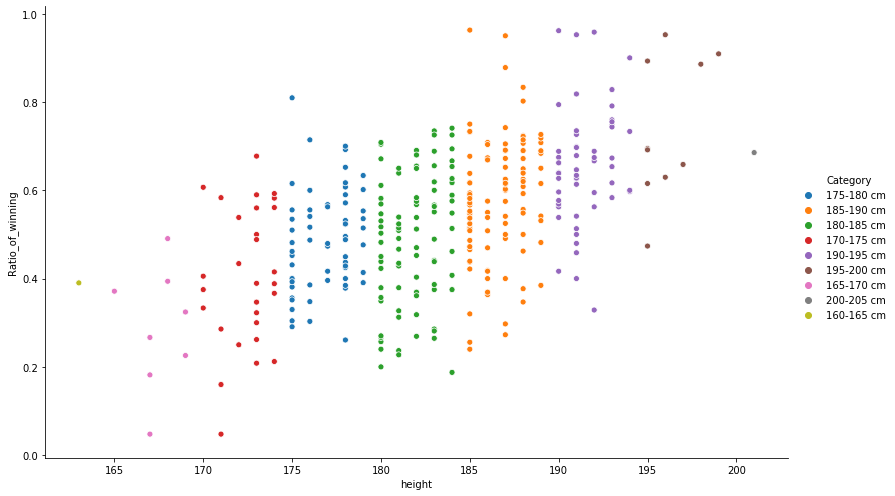

In [17]:
# plot the result with seaborn library
sns.relplot(x="height", y="Ratio_of_winning", hue="Category", data = air_summary,height=7, aspect=1.6)

**[CRQ1] What are the time slots of the match with more goals? Let's analyse and visualise the goals distribution into 9-minutes sets for all the matches. I.e., let's transform the minute of a goal from a continuous variable in a discrete variable (e.g. A goal scored in 5th minute, will end up in the interval[0-9]**
Remind that every match goes usually from minute 0, to minute 90, but in football it is always added an arbitary amount of extra-time to every half of the match, thus consider also the intervals "45+" and "90+"

**Make a barplot with the absolute frequency of goals in all the time slots.
Find the top 10 teams that score the most in the interval "81-90".
Show if there are players that were able to score at least one goal in 8 different intervals.**


In [22]:
PL_events = pd.read_json("/Users/macbook/Desktop/Lev/Sapienza/ADM_Labs/HW2/Data/events/events_England.json")

In [23]:
def minute_extract(data):
    if data["matchPeriod"] == "1H" and (data["eventSec"]/60) >45:
        return str("45+ m")
    elif data["matchPeriod"] == "2H" and (45 + (data["eventSec"]/60)) > 90:
        return str("90+ m")
    elif data["matchPeriod"] == "1H":
        return str(int((data["eventSec"]/60//9)*9)) +"-"+ str(int((data["eventSec"]/60//9)*9 + 9)) + " m"
    elif data["matchPeriod"] == "2H":
        return str(int(45 + int(data["eventSec"]/60//9)*9)) +"-"+ str(int(45 + int(data["eventSec"]/60//9)*9 + 9)) + " m"
    
PL_events["Time_interval"] = PL_events.apply(minute_extract,axis=1)

In [24]:
# creating the tags column into new column with string type
PL_events['str_tags'] = PL_events['tags'].astype('str') 
PL_events = PL_events[['eventId', 'eventName', 'eventSec', 'id', 'matchId', 'matchPeriod',
       'playerId', 'subEventId', 'subEventName','str_tags','tags', 'teamId', 'Time_interval']]


### Find all goals: through event id 9 which means the goalkeeper tryed to save his gate and the tags 101 and 1802 which means that there were the attack to the gate and goalkeeper didn't save the gate

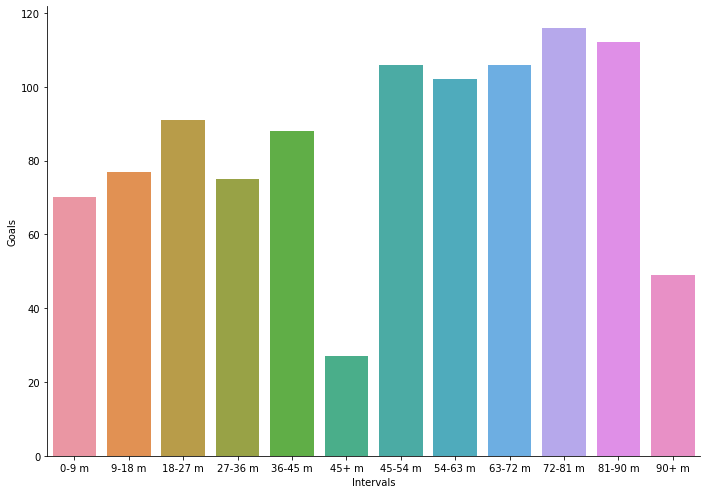

In [25]:
# next 2 func i need to do the intersection with the right event
def a_1802(s):
    if "1802" in s:
        return True
    else:
        return False
def a_101(s):
    if "{'id': 101}" in s:
        return True
    else:
        return False      
PL_events_2 = PL_events[(PL_events["eventId"] == 9) & (PL_events["str_tags"].apply(a_101))& (PL_events["str_tags"].apply(a_1802))].reset_index(drop = True)

# do the dict of the intercals and 0 goals
d = {key: 0 for key in list(PL_events["Time_interval"].unique())}
#count = 0
# this loop takes the tags clolumn and open the first and last elements in the list 
# first and last because there is a priority (order)
for i in PL_events_2.index:
    # we have to use try because there is some tags which doesn't have elements
    try:
        # if there is an accurate goal i summ it with help of dict
        if PL_events_2["tags"][i][0]["id"] == 101 and PL_events_2["tags"][i][-1]["id"] == 1802 :
            d[PL_events_2["Time_interval"][i]] += 1 
            #count += 1
        # if there is a goal in own gate i summ it too
        elif PL_events_2["tags"][i][0]["id"] == 102 and PL_events_2["tags"][i][-1]["id"] == 1802 :
            d[PL_events_2["Time_interval"][i]] += 1
            #count += 1
    except:
        pass
data = pd.DataFrame()
data["Intervals"] = list(d.keys())
data["Goals"] = list(d.values())
# create the plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # sixe of the plot
sns.barplot(x = "Intervals", y = "Goals"  ,data = data,ax=ax) # create a bar blot
sns.despine() # show 








### Prerape tha data to do CRQ2 second question: Find the top 10 teams that score the most in the interval "81-90"

In [27]:
PL_events_CRQ2 = PL_events[PL_events["Time_interval"] == "81-90 m"].reset_index(drop = True)

Here i need to find the top 10 commands in time interval 81-90 so that means that i have to look through tags 101 and 1801 (and tag 102)??? 

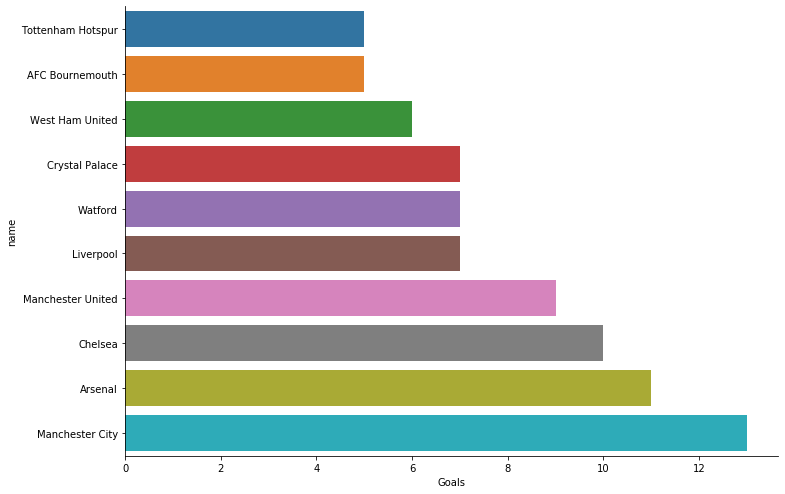

In [28]:
d_command = {key: 0 for key in list(PL_events_CRQ2["teamId"].unique())}
count = 0
for i in PL_events_CRQ2.index:
    # we have to use try because there is some tags which doesn't have elements
    try:
        # if there is an accurate goal i summ it with help of dict
        if PL_events_CRQ2["tags"][i][0]["id"] == 101 and PL_events_CRQ2["tags"][i][-1]["id"] == 1801 :
            d_command[PL_events_CRQ2["teamId"][i]] += 1 
            count += 1
        # if there is a goal in own gate i summ it too
        elif PL_events_CRQ2["tags"][i][0]["id"] == 102 and PL_events_CRQ2["tags"][i][-1]["id"] == 1801 :
            d_command[PL_events_CRQ2["teamId"][i]] += 1
            count += 1
    except:
        pass
top_10 = dict(sorted(d_command.items(), key=lambda x:x[1])[-10:]) # sort the dick and get top 10
# create the DataFrame to use properly the seaborn library
data = pd.DataFrame()
data["commandId"] = list(top_10.keys())
data["Goals"] = list(top_10.values())
data = data.merge(teams,left_on='commandId', right_on='wyId' )
# create the plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # sixe of the plot
sns.barplot(x = data["Goals"], y = data["name"]  ) # create a bar blot
sns.despine() # show 

In [29]:
# next two fuctions for data preparation 
def a_1801(s):
    if "1801" in s:
        return True
    else:
        return False
def a_101(s):
    if "{'id': 101}"  in s:
        return True
    else:
        return False
# left only that columns which i will need
PL_events_3 = PL_events[["eventName","playerId","tags","str_tags","Time_interval"]]
# intersection by 101 tag and 1801 tag which will leave only goals
PL_events_3 = PL_events_3[(PL_events_3["str_tags"].apply(a_101)) & (PL_events_3["str_tags"].apply(a_1801))].reset_index(drop = True)




### Find the players who could score at least one goal in 8 different time intervals

In [58]:
PL_events_3 = PL_events_3[['eventName', 'playerId','str_tags', 'Time_interval']] # it is imposible to use nunique method with lists
a = PL_events_3.groupby(by = ["playerId"]).nunique() # count unique
a = a[a["Time_interval"] >= 8] # leave that who got 8 or more
data = a.merge(players,left_index=True, right_on='wyId')
data["name"] = data["firstName"] + " " + data["lastName"]
data = data[["wyId","name"]]
data.reset_index(drop = True)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


,wyId,name
0,3324,\u00c1lvaro Borja Morata Mart\u00edn
1,7905,Romelu Lukaku Menama
2,8422,Wilfried Zaha
3,8717,Harry Kane
4,11066,Raheem Shaquille Sterling
5,12829,Jamie Vardy
6,14703,Marko Arnautovi\u0107
7,15808,Roberto Firmino Barbosa de Oliveira
8,25413,Alexandre Lacazette
9,26150,Riyad Mahrez


In [ ]:
# def a_1801(s):
#     if "1801" in s:
#         return True
#     else:
#         return False
# def a_101_102(s):
#     if "{'id': 101}" in s or "{'id': 102}" :
#         return True
#     else:
#         return False 
# # take intersection of tags 101 102 and 1801
# PL_events_101_102 = PL_events[(PL_events["str_tags"].apply(a_101_102))& (PL_events["str_tags"].apply(a_1801))].reset_index(drop = True)
# # do the dict of the intercals and 0 goals
# d = {key: 0 for key in list(PL_events_101_102["Time_interval"].unique())}
# #count = 0
# # this loop takes the tags clolumn and open the first and last elements in the list 
# # first and last because there is a priority (order)
# for i in PL_events_101_102.index:
#     # we have to use try because there is some tags which doesn't have elements
#     try:
#         # if there is an accurate goal i summ it with help of dict
#         if PL_events_101_102["tags"][i][0]["id"] == 101 and PL_events_101_102["tags"][i][-1]["id"] == 1801 :
#             d[PL_events_101_102["Time_interval"][i]] += 1 
#             #count += 1
#         # if there is a goal in own gate i summ it too
#         elif PL_events_101_102["tags"][i][0]["id"] == 102 and PL_events_101_102["tags"][i][-1]["id"] == 1801 :
#             d[PL_events_101_102["Time_interval"][i]] += 1
#             #count += 1
#     except:
#         pass
# data = pd.DataFrame()
# data["Intervals"] = list(d.keys())
# data["Goals"] = list(d.values())
# # create the plot
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27) # sixe of the plot
# sns.barplot(x = "Intervals", y = "Goals"  ,data = data,ax=ax) # create a bar blot
# sns.despine() # show 

In [ ]:
# # takes the data in my case it is a row and check which half of the game it is
# def minute_extract(data):
#     if data["matchPeriod"] == "1H":
#         return (data["eventSec"]/60)
#     elif data["matchPeriod"] == "2H":
#         return (45 + data["eventSec"]/60)
    
# PL_events["Minute"] = PL_events.apply(minute_extract,axis=1)

# # create the time intervals for fist half of the game and for second
# intervals_1 = np.sort(np.concatenate((np.arange(0,54,9),np.arange(9,45,9))))
# intervals_2 = np.sort(np.concatenate((np.arange(45,99,9),np.arange(54,90,9))))
# categories = []
# for i in PL_events.index:
#     if PL_events["matchPeriod"][i] == "1H": # to understanda which half is it 
#         for j in range(0,len(intervals_1)-1 ,2): # loop to find the interval 
#             if intervals_1[j] <= PL_events["Minute"][i] < intervals_1[j+1]:  
#                 categories.append(str(intervals_1[j])+"-"+ str(intervals_1[j+1]) + " m") # add the right interval into list
#             # the intervals look like [0,9), [9,18) ... [36,45) so if the minute of the first half is bigger than 45 i add 45+
#             elif PL_events["Minute"][i] >= 45:  
#                 categories.append("45+ m")
#                 # because one element of the data goes throw the loon 5 times till find the right interval
#                 # but when the time > 45 it means that this element will go 5 times and add 5 times 45+
#                 # to prevent it i did the break
#                 break 
#     # same structure but for second half            
#     elif PL_events["matchPeriod"][i] == "2H":
#         for j in range(0,len(intervals_2)-1 ,2):
#             if intervals_2[j] <= PL_events["Minute"][i] < intervals_2[j+1]:
#                 categories.append(str(intervals_2[j])+"-"+ str(intervals_2[j+1]) + " m")
#             elif PL_events["Minute"][i] >= 90:
#                 categories.append("90+ m")
#                 break
# PL_events["Time_interval"] = categories